In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import explained_variance_score, \
    mean_absolute_error, \
    median_absolute_error
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv('data.csv').set_index('date')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
meantempm,997.0,13.129388,10.971591,-17.0,5.0,15.0,22.00,32.00
maxtempm,997.0,19.509529,11.577275,-12.0,11.0,22.0,29.00,38.00
mintempm,997.0,6.438315,10.957267,-27.0,-2.0,7.0,16.00,26.00
meantempm_1,997.0,13.109328,10.984613,-17.0,5.0,15.0,22.00,32.00
meantempm_2,997.0,13.088265,11.001106,-17.0,5.0,14.0,22.00,32.00
meantempm_3,997.0,13.066199,11.017312,-17.0,5.0,14.0,22.00,32.00
meandewptm_1,997.0,6.440321,10.596265,-22.0,-2.0,7.0,16.00,24.00
meandewptm_2,997.0,6.420261,10.606550,-22.0,-2.0,7.0,16.00,24.00
meandewptm_3,997.0,6.393180,10.619083,-22.0,-2.0,7.0,16.00,24.00
meanpressurem_1,997.0,1016.139418,7.582453,989.0,1011.0,1016.0,1021.00,1040.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 2015-01-04 to 2017-09-27
Data columns (total 39 columns):
meantempm          997 non-null int64
maxtempm           997 non-null int64
mintempm           997 non-null int64
meantempm_1        997 non-null float64
meantempm_2        997 non-null float64
meantempm_3        997 non-null float64
meandewptm_1       997 non-null float64
meandewptm_2       997 non-null float64
meandewptm_3       997 non-null float64
meanpressurem_1    997 non-null float64
meanpressurem_2    997 non-null float64
meanpressurem_3    997 non-null float64
maxhumidity_1      997 non-null float64
maxhumidity_2      997 non-null float64
maxhumidity_3      997 non-null float64
minhumidity_1      997 non-null float64
minhumidity_2      997 non-null float64
minhumidity_3      997 non-null float64
maxtempm_1         997 non-null float64
maxtempm_2         997 non-null float64
maxtempm_3         997 non-null float64
mintempm_1         997 non-null float64
mintempm_2

In [8]:
df = df.drop(['mintempm', 'maxtempm'], axis=1)

In [9]:
# X will be a pandas dataframe of all columns except meantempm
X = df[[col for col in df.columns if col != 'meantempm']]

# y will be a pandas series of the meantempm
y = df['meantempm']

In [10]:
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, random_state=23)

In [11]:
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=23)

X_train.shape, X_test.shape, X_val.shape
print("Training instances   {}, Training features   {}".format(X_train.shape[0], X_train.shape[1]))
print("Validation instances {}, Validation features {}".format(X_val.shape[0], X_val.shape[1]))
print("Testing instances    {}, Testing features    {}".format(X_test.shape[0], X_test.shape[1]))

Training instances   797, Training features   36
Validation instances 100, Validation features 36
Testing instances    100, Testing features    36


In [12]:
feature_cols = [tf.feature_column.numeric_column(col) for col in X.columns]

In [13]:
regressor = tf.estimator.DNNRegressor(feature_columns=feature_cols,
                                      hidden_units=[50, 50],
                                      model_dir='tf_wx_model')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'tf_wx_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f07a1fb0748>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [14]:
def wx_input_fn(X, y=None, num_epochs=None, shuffle=True, batch_size=400):
    return tf.estimator.inputs.pandas_input_fn(x=X,
                                               y=y,
                                               num_epochs=num_epochs,
                                               shuffle=shuffle,
                                               batch_size=batch_size)

In [15]:
evaluations = []
STEPS = 400
for i in range(100):
    regressor.train(input_fn=wx_input_fn(X_train, y=y_train), steps=STEPS)
    evaluations.append(regressor.evaluate(input_fn=wx_input_fn(X_val,
                                                               y_val,
                                                               num_epochs=1,
                                                               shuffle=False)))


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Savi

INFO:tensorflow:Loss for final step: 6350.486.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-30T15:26:49Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-1600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-04-30-15:26:49
INFO:tensorflow:Saving dict for global step 1600: average_loss = 13.47456, global_step = 1600, label/mean = 14.25, loss = 1347.4559, prediction/mean = 14.015658
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1600: tf_wx_model/model.ckpt-1600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-1600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 3600: tf_wx_model/model.ckpt-3600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-3600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 3600 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 5393.6445, step = 3601
INFO:tensorflow:global_step/sec: 115.01
INFO:tensorflow:loss = 5735.837, step = 3701 (0.871 sec)
INFO:tensorflow:global_step/sec: 120.525
INFO:tensorflow:loss = 5343.1523, step = 3801 (0.830 sec)
INFO:tensorflow:global_step/sec: 121.649
INFO:tensorflow:loss = 6001.0327, step = 3901 (0.822 sec)
INFO:tensorflow:Saving checkpoints for 4000 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 6007.904.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calli

INFO:tensorflow:Saving checkpoints for 6000 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 4945.9897.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-30T15:27:46Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-6000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-04-30-15:27:46
INFO:tensorflow:Saving dict for global step 6000: average_loss = 10.736571, global_step = 6000, label/mean = 14.25, loss = 1073.6571, prediction/mean = 14.018688
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: tf_wx_model/model.ckpt-6000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-6000
INFO:tensorf

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-8000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 8000 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 5235.22, step = 8001
INFO:tensorflow:global_step/sec: 115.589
INFO:tensorflow:loss = 5215.31, step = 8101 (0.866 sec)
INFO:tensorflow:global_step/sec: 118.734
INFO:tensorflow:loss = 5656.4756, step = 8201 (0.842 sec)
INFO:tensorflow:global_step/sec: 116.978
INFO:tensorflow:loss = 5397.084, step = 8301 (0.855 sec)
INFO:tensorflow:Saving checkpoints for 8400 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 5385.7007.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-30T15:28:17Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-30T15:28:44Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-10400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-04-30-15:28:45
INFO:tensorflow:Saving dict for global step 10400: average_loss = 10.39284, global_step = 10400, label/mean = 14.25, loss = 1039.284, prediction/mean = 14.320387
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10400: tf_wx_model/model.ckpt-10400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-10400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 10400 i

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-12400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 12400 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 4635.693, step = 12401
INFO:tensorflow:global_step/sec: 111.34
INFO:tensorflow:loss = 4735.454, step = 12501 (0.899 sec)
INFO:tensorflow:global_step/sec: 117.234
INFO:tensorflow:loss = 4945.205, step = 12601 (0.853 sec)
INFO:tensorflow:global_step/sec: 113.513
INFO:tensorflow:loss = 5237.0674, step = 12701 (0.881 sec)
INFO:tensorflow:Saving checkpoints for 12800 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 5469.4062.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-30T15:29:16Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/mo

INFO:tensorflow:Loss for final step: 5108.997.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-30T15:29:42Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-14800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-04-30-15:29:42
INFO:tensorflow:Saving dict for global step 14800: average_loss = 10.355454, global_step = 14800, label/mean = 14.25, loss = 1035.5454, prediction/mean = 14.530359
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 14800: tf_wx_model/model.ckpt-14800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-14800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_o

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-16800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 16800 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 5242.49, step = 16801
INFO:tensorflow:global_step/sec: 113.426
INFO:tensorflow:loss = 4826.9893, step = 16901 (0.883 sec)
INFO:tensorflow:global_step/sec: 116.395
INFO:tensorflow:loss = 4909.868, step = 17001 (0.859 sec)
INFO:tensorflow:global_step/sec: 115.745
INFO:tensorflow:loss = 4740.963, step = 17101 (0.864 sec)
INFO:tensorflow:Saving checkpoints for 17200 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 5457.63.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-30T15:30:14Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Res

INFO:tensorflow:Loss for final step: 5422.865.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-30T15:30:40Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-19200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-04-30-15:30:40
INFO:tensorflow:Saving dict for global step 19200: average_loss = 11.683944, global_step = 19200, label/mean = 14.25, loss = 1168.3944, prediction/mean = 13.060892
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 19200: tf_wx_model/model.ckpt-19200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-19200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_o

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-21200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 21200 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 5155.4185, step = 21201
INFO:tensorflow:global_step/sec: 114.172
INFO:tensorflow:loss = 5068.652, step = 21301 (0.877 sec)
INFO:tensorflow:global_step/sec: 116.098
INFO:tensorflow:loss = 4746.162, step = 21401 (0.862 sec)
INFO:tensorflow:global_step/sec: 117.497
INFO:tensorflow:loss = 5089.482, step = 21501 (0.851 sec)
INFO:tensorflow:Saving checkpoints for 21600 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 4416.8125.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-30T15:31:12Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:

INFO:tensorflow:Loss for final step: 5151.7417.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-30T15:31:39Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-23600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-04-30-15:31:39
INFO:tensorflow:Saving dict for global step 23600: average_loss = 10.196037, global_step = 23600, label/mean = 14.25, loss = 1019.6037, prediction/mean = 14.126326
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 23600: tf_wx_model/model.ckpt-23600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-23600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-25600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 25600 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 4970.8936, step = 25601
INFO:tensorflow:global_step/sec: 111.893
INFO:tensorflow:loss = 5494.502, step = 25701 (0.894 sec)
INFO:tensorflow:global_step/sec: 115.304
INFO:tensorflow:loss = 5394.494, step = 25801 (0.867 sec)
INFO:tensorflow:global_step/sec: 114.141
INFO:tensorflow:loss = 5003.006, step = 25901 (0.876 sec)
INFO:tensorflow:Saving checkpoints for 26000 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 4687.4883.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-30T15:32:11Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:

INFO:tensorflow:Loss for final step: 4366.166.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-30T15:32:38Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-28000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-04-30-15:32:38
INFO:tensorflow:Saving dict for global step 28000: average_loss = 10.35158, global_step = 28000, label/mean = 14.25, loss = 1035.158, prediction/mean = 13.794143
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 28000: tf_wx_model/model.ckpt-28000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-28000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-30000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 30000 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 4755.9604, step = 30001
INFO:tensorflow:global_step/sec: 111.839
INFO:tensorflow:loss = 4508.256, step = 30101 (0.895 sec)
INFO:tensorflow:global_step/sec: 116.25
INFO:tensorflow:loss = 5197.2363, step = 30201 (0.860 sec)
INFO:tensorflow:global_step/sec: 115.007
INFO:tensorflow:loss = 4784.2617, step = 30301 (0.870 sec)
INFO:tensorflow:Saving checkpoints for 30400 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 4727.5195.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-30T15:33:10Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow

INFO:tensorflow:Loss for final step: 4847.7676.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-30T15:33:37Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-32400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-04-30-15:33:38
INFO:tensorflow:Saving dict for global step 32400: average_loss = 10.202233, global_step = 32400, label/mean = 14.25, loss = 1020.2233, prediction/mean = 13.9101095
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 32400: tf_wx_model/model.ckpt-32400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-32400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-34400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 34400 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 5373.669, step = 34401
INFO:tensorflow:global_step/sec: 109.137
INFO:tensorflow:loss = 5207.766, step = 34501 (0.917 sec)
INFO:tensorflow:global_step/sec: 112.049
INFO:tensorflow:loss = 5045.378, step = 34601 (0.893 sec)
INFO:tensorflow:global_step/sec: 112.978
INFO:tensorflow:loss = 5058.683, step = 34701 (0.885 sec)
INFO:tensorflow:Saving checkpoints for 34800 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 4317.896.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-30T15:34:11Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Re

INFO:tensorflow:Loss for final step: 4741.874.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-30T15:34:38Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-36800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-04-30-15:34:38
INFO:tensorflow:Saving dict for global step 36800: average_loss = 10.276423, global_step = 36800, label/mean = 14.25, loss = 1027.6423, prediction/mean = 13.775909
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 36800: tf_wx_model/model.ckpt-36800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-36800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_o

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-38800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 38800 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 4393.3003, step = 38801
INFO:tensorflow:global_step/sec: 109.194
INFO:tensorflow:loss = 5597.1904, step = 38901 (0.917 sec)
INFO:tensorflow:global_step/sec: 114.223
INFO:tensorflow:loss = 5551.6113, step = 39001 (0.875 sec)
INFO:tensorflow:global_step/sec: 115.711
INFO:tensorflow:loss = 5111.3315, step = 39101 (0.864 sec)
INFO:tensorflow:Saving checkpoints for 39200 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 5498.409.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-30T15:35:10Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflo

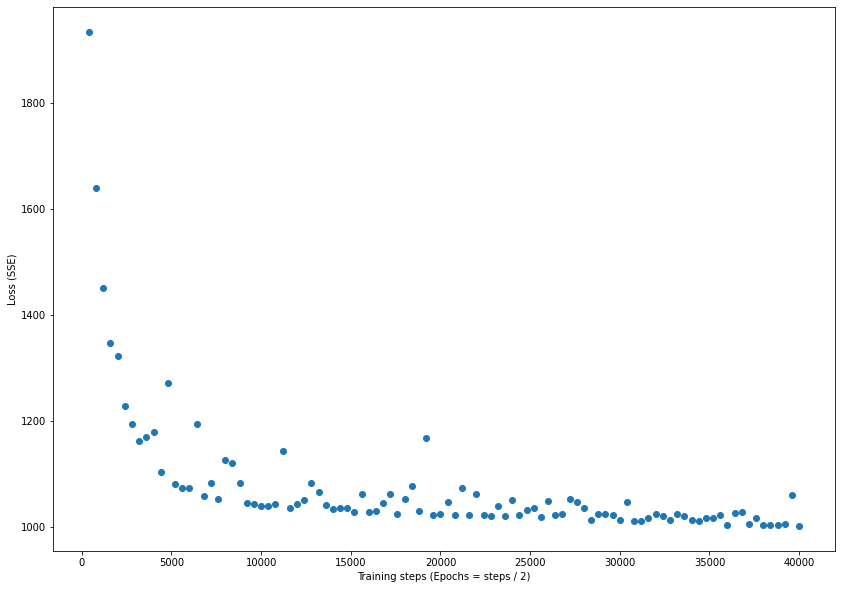

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [14, 10]

loss_values = [ev['loss'] for ev in evaluations]
training_steps = [ev['global_step'] for ev in evaluations]

plt.scatter(x=training_steps, y=loss_values)
plt.xlabel('Training steps (Epochs = steps / 2)')
plt.ylabel('Loss (SSE)')
plt.show()

In [17]:
pred = regressor.predict(input_fn=wx_input_fn(X_test,
                                              num_epochs=1,
                                              shuffle=False))
predictions = np.array([p['predictions'][0] for p in pred])

print("The Explained Variance: %.2f" % explained_variance_score(
                                            y_test, predictions))  
print("The Mean Absolute Error: %.2f degrees Celcius" % mean_absolute_error(
                                            y_test, predictions))  
print("The Median Absolute Error: %.2f degrees Celcius" % median_absolute_error(
                                            y_test, predictions))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
The Explained Variance: 0.89
The Mean Absolute Error: 3.03 degrees Celcius
The Median Absolute Error: 2.37 degrees Celcius
